In [1]:
from math import sqrt

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = pd.read_excel('./Мат.Статистика.xlsx')
data = data.dropna()
data.head()

,id,Name,height,random_number,month_of_birth
0,1,Базанова Дарья Владимировна,162.0,2.0,1.0
1,2,Байгускаров Данияр Шакирьянович,180.0,4.0,2.0
2,3,Балобин Дмитрий Юрьевич,169.0,7.0,3.0
3,4,Борисов Алексей Михайлович,180.0,3.0,2.0
5,6,Власов Виктор Сергеевич,183.0,4.0,8.0


In [3]:
def create_variate_row(df: pd.DataFrame, row_name: str, add_index: float = 1) -> pd.DataFrame:
    variate_row = pd.DataFrame()
    variate_row['count'] = df.groupby(row_name).count()['id']
    if add_index is not None:
        variate_row.loc[add_index] = 0
        variate_row = variate_row.sort_index()
    variate_row['frequency'] = variate_row['count'] / df['id'].count()
    variate_row['cummulative_dist'] = np.cumsum(variate_row['frequency'])
    return variate_row

In [4]:
variate_row = create_variate_row(data, 'random_number')
variate_row

,count,frequency,cummulative_dist
random_number,,,
1.0,0,0.000000,0.000000
2.0,3,0.142857,0.142857
3.0,4,0.190476,0.333333
4.0,5,0.238095,0.571429
5.0,3,0.142857,0.714286
6.0,1,0.047619,0.761905
7.0,5,0.238095,1.000000


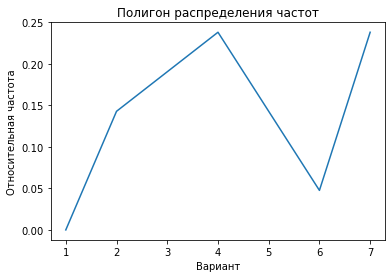

In [5]:
plt.title('Полигон распределения частот')
plt.plot(variate_row.index, variate_row['frequency'])
plt.xlabel('Вариант')
plt.ylabel('Относительная частота')
plt.show()

In [6]:
discrete_x = []
discrete_y = []
prev_y = 0
for index in variate_row.index:
    discrete_x.append(index)
    discrete_y.append(prev_y)
    discrete_x.append(index)
    prev_y = variate_row['cummulative_dist'][index]
    discrete_y.append(prev_y)
discrete_x.append(discrete_x[-1] + .1)
discrete_y.append(discrete_y[-1])

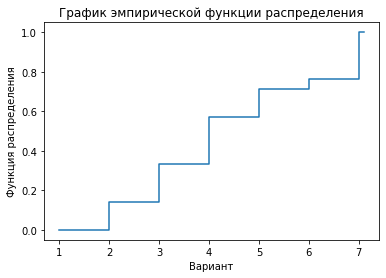

In [7]:
plt.title('График эмпирической функции распределения')
plt.plot(discrete_x, discrete_y)
plt.xlabel('Вариант')
plt.ylabel('Функция распределения')
plt.show()

In [8]:
np.std(variate_row['count'] * variate_row.index)

10.715238052913815

In [9]:
std_v = np.mean(variate_row['count'])
print(f'Выборочное среднее: {std_v}')

Выборочное среднее: 3.0


In [10]:
var = np.var(variate_row['count'])
print(f'Выборочная дисперсия: {var}')

Выборочная дисперсия: 3.142857142857143


In [11]:

print(f'Квадрат: {sqrt(var)}')

Квадрат: 1.7728105208558367


In [12]:

print(f'Вариация: {sqrt(var) / std_v * 100} %')

Вариация: 59.093684028527896 %


In [13]:
variate_row_1 = create_variate_row(data, 'month_of_birth', add_index=11)
variate_row_1

,count,frequency,cummulative_dist
month_of_birth,,,
1.0,3,0.142857,0.142857
2.0,4,0.190476,0.333333
3.0,1,0.047619,0.380952
4.0,2,0.095238,0.476190
5.0,1,0.047619,0.523810
7.0,1,0.047619,0.571429
8.0,3,0.142857,0.714286
9.0,2,0.095238,0.809524
10.0,2,0.095238,0.904762


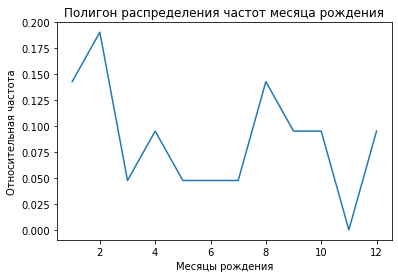

In [14]:
plt.title('Полигон распределения частот месяца рождения')
plt.plot(variate_row_1.index, variate_row_1['frequency'])
plt.xlabel('Месяцы рождения')
plt.ylabel('Относительная частота')
plt.show()